# TITANIC SURVIVAL PREDICTION CODSOFT INTERN TASK 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r'C:\Users\KARTHIK\Downloads\titanic.csv'

In [4]:
titanic_data = pd.read_csv(file_path)

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
titanic_data.duplicated().sum()

0

In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
titanic_data = titanic_data.drop(['Age', 'Cabin'], axis=1)

In [13]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,0,0,7538,9.2250,S
6,898,1,3,"Connolly, Miss. Kate",female,0,0,330972,7.6292,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,1,1,248738,29.0000,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,0,0,2657,7.2292,C
9,901,0,3,"Davies, Mr. John Samuel",male,2,0,A/4 48871,24.1500,S


In [14]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [15]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [17]:
titanic_data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

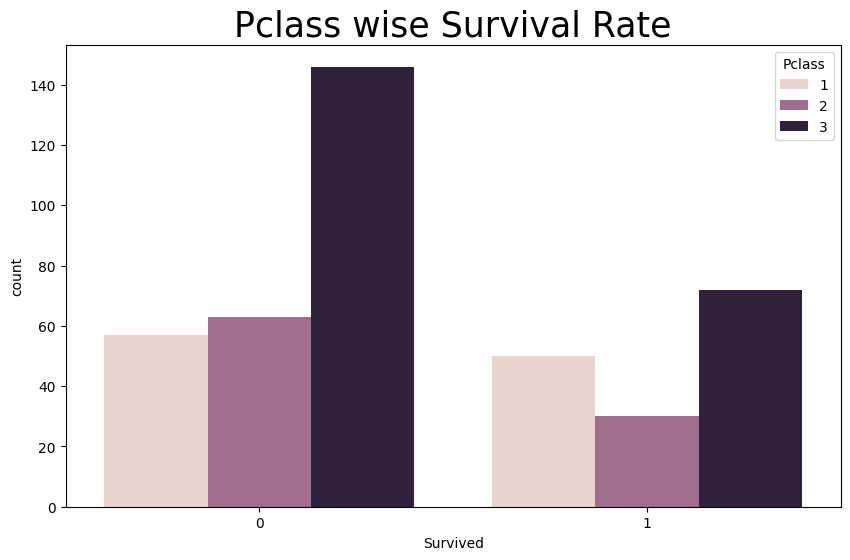

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x=titanic_data['Survived'], hue=titanic_data['Pclass'])
plt.title('Pclass wise Survival Rate', fontsize=25)  
plt.show()

In [18]:
titanic_data['Sex']

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

In [23]:
titanic_data['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

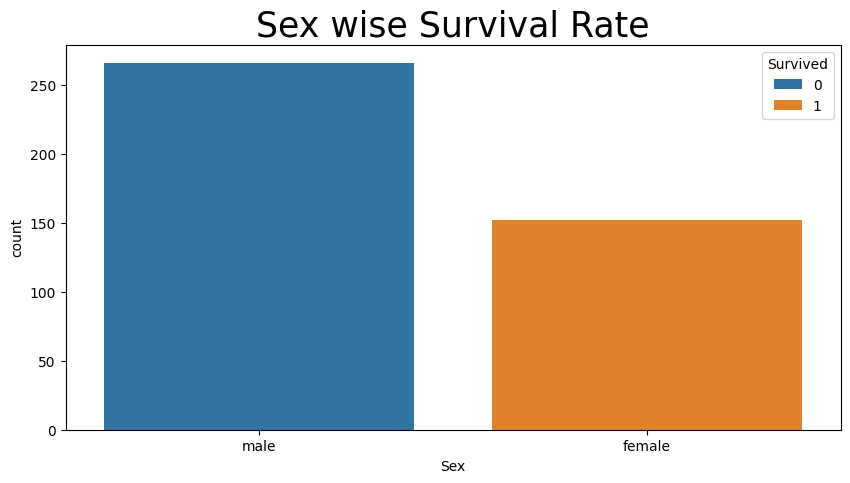

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x=titanic_data['Sex'], hue=titanic_data['Survived'])
plt.title('Sex wise Survival Rate', fontsize=25)  
plt.show()

In [25]:
titanic_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [26]:
titanic_data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

titanic_data['Sex']= labelencoder.fit_transform(titanic_data['Sex'])

titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",1,0,0,7538,9.2250,S
6,898,1,3,"Connolly, Miss. Kate",0,0,0,330972,7.6292,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",1,1,1,248738,29.0000,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,0,0,2657,7.2292,C
9,901,0,3,"Davies, Mr. John Samuel",1,2,0,A/4 48871,24.1500,S


In [29]:

titanic_data['Survived']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [30]:
titanic_data['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32

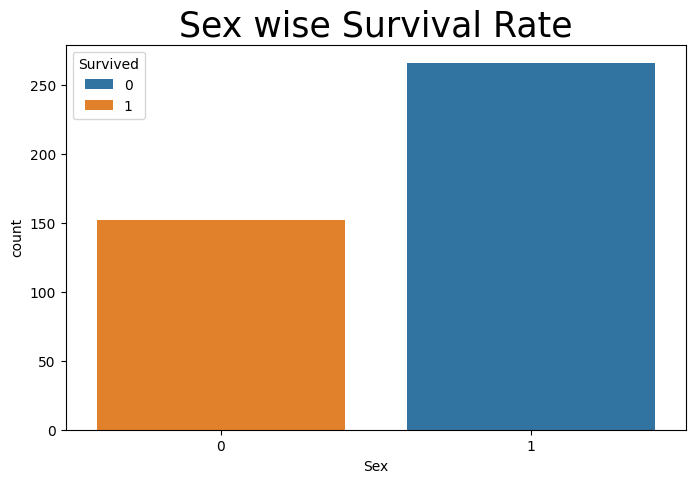

In [31]:
plt.figure(figsize = (8,5))
sns.countplot(x=titanic_data['Sex'], hue=titanic_data["Survived"])
plt.title('Sex wise Survival Rate', fontsize=25)  
plt.show()

In [32]:
X= titanic_data[['Pclass', 'Sex']]
Y= titanic_data['Survived']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [35]:
prediction = print(log.predict(X_test))

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1]


In [36]:
print(Y_test)

360    0
170    0
224    1
358    0
309    1
      ..
235    0
286    0
190    0
65     1
179    1
Name: Survived, Length: 63, dtype: int64


In [37]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[2,1]])

if(res==0):
  print("SORRY, DID NOT SURVIVED...")
else:
  print("SURVIVED!")

SORRY, DID NOT SURVIVED...
